# **SENTIMENT ANALYSIS:**

# New Section

# New Section

**Performing NLP (Natural Language Processing):**

**Natural Language Processing is a technique developed for computers to understand human language and read the sentiment or intention behind each sentence. This technique uses computer programming, and machine learning to develop and train different models to decode raw human language and classify it.*

**Problem Understanding:**

The goal of this project is building a machine learnning model to classify and predict movie reviews as either positive or negative. The data provided is labelled therefore, supervised machine learning classification models (Logistic Regression, Linear SVM, Naive Bayes) will be trained and tested. Multiple models will be used and then evaluated. The best performing model will be highlighted.

In [ ]:
#importing dataset
import pandas as pd
df=pd.read_csv("/content/IMDB Dataset.csv")
#checking dataset for any inconsistencies
df.head(5)
df['sentiment'].unique()
df['sentiment'].describe()
#the dataset is unbiased. It has exact 25000 positive reviews and 2 unique entries only

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

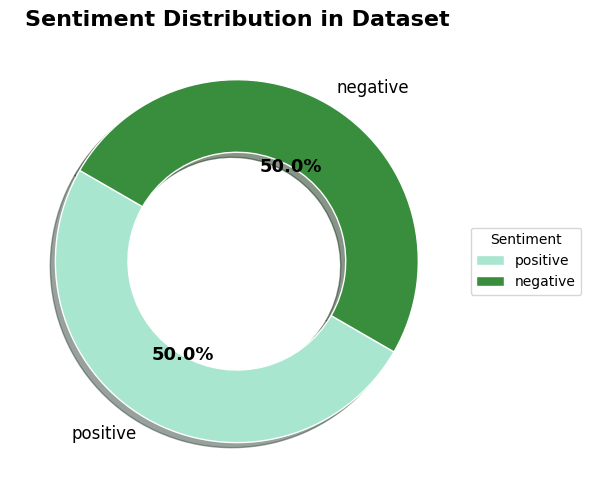

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#a8e6cf', '#388e3c']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=150,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    textprops=dict(color="black", fontsize=12)
)
plt.setp(autotexts, size=13, weight="bold")
plt.title("Sentiment Distribution in Dataset", fontsize=16, weight='bold')
ax.legend(wedges, labels, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()
#It ensures that the dataset is unbiased

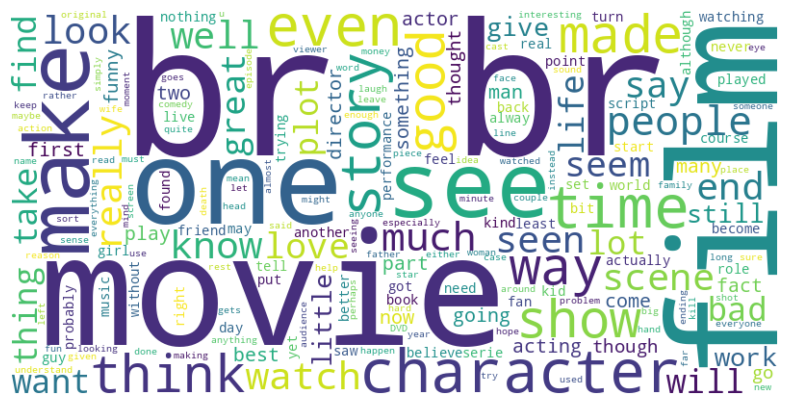

In [ ]:
#creating a word cloud to better visualize the common words.
from wordcloud import WordCloud
text = " ".join(df['review'].astype(str))#converting the series (review) into a string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Repeated occurence of 'br' tells there are many html tags in the review section. Careful analysis showed 2 spelling mistakes frequently occuring in this word cloud. First is the word 'u' that should have been 'you' and second is the word 'serie' which should have been 'series'*

In [ ]:
df['review'].unique()

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

**The analysis of review section shows:
Numbers used in reviews do hold meaning. They don't need to be removed.
There are some spelling mistakes in the dataset. Using textblob takes hours to remove spelling mistakes from 50000 reviews, so I had to develop another strategy. Here are some noted spelling mistakes: 'serie', 'terrificly', 'u' which should have been 'series', 'terrifically' and 'you' respectively.
Some abbreviations were also identified: can't, they're, couldn't, wouldn't ,you'll, doesn't, i've, don't ,i'm.
I believe this won't help much. A better strategy would be to convert the reviews to tokens and than analyzing the unique words.*

In [ ]:
words = []
#creating a list of words that I can analyze to better view to kind of unique words the dataset hold.
reviews = df['review']
for review in reviews:
    words.extend(review.split())
print(np.unique(words))

['\x08\x08\x08\x08A' '\x10own' '!' ... '₤250,000' '★★' '\uf0b7']


**\x08, \x10 → Hexadecimal escape characters (non-printable ASCII/control characters),
\uf0b7 → A Unicode character, likely a bullet point (•),
'★★' → Possibly star ratings,
'₤250,000' → A currency with a special symbol.*

In [ ]:
!pip install contractions

In [ ]:
!pip install swifter

In [ ]:
#importing all related libraries
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from spellchecker import SpellChecker
from nltk.corpus import words
nltk.download('words')
#this function will check if the two words separated by a punctuation are ASCII (real english words) or not. if they are ASCII, space will be added between them to ensure they do not join together after punctuation removal
valid_words_set = set(words.words())
spell = SpellChecker()
def is_real_ascii_word(word):
    return word.isascii() and word.isalpha() and word.lower() in valid_words_set
def smart_punctuation_spacing(text):
    pattern = re.compile(r'(\b\w+)([' + re.escape(string.punctuation) + r'])(\w+\b)')
    def replacer(match):
        word1, punct, word2 = match.groups()
        if is_real_ascii_word(word1) and is_real_ascii_word(word2):
            return f"{word1} {punct} {word2}"
        else:
            return f"{word1}{punct}{word2}"
    return pattern.sub(replacer, text)
#creating a preprocessing function that will be applied on every review of the dataset
def preprocess(a):
    lowercased_text=a.lower()#lowercasing the reviews
    no_br_text = lowercased_text.replace('br', ' ')#replacing br with space because after removing punctuation, it becomes a part of a bigger word, and stays in the dataset
    spaced_text = smart_punctuation_spacing(no_br_text)#applying the function built above
    noContraction_text= contractions.fix(spaced_text)#removing contractions
    noPunctuation_text=noContraction_text.translate(str.maketrans('','',string.punctuation))#removing punctuation marks
    htmlFree_text=re.sub(r'<.*?>', '', noPunctuation_text)#removing html tags
    ascii_only_text = htmlFree_text.encode('ascii', errors='ignore').decode()#removing non-ASCII words
    #removing emojis
    printable_ascii = ''.join(char for char in ascii_only_text if char in string.printable and char not in '\x00\x01\x02\x03\x04\x05\x06\x07\x08\x09\x0b\x0c\x0e\x0f\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e\x1f\x7f')
    noSymbol_text=re.sub(r'[^\w\s]','',printable_ascii)#removing symbols
    #removing numbers decreased the model accuracy, therefore, numbers are not removed
    #removing stopwords:
    stopwords_to_remove=set(stopwords.words('english'))
    stopwords_to_remove.add('br')#I can see that br appears repeatedly and html tags are not removing br.
    words=noSymbol_text.split()#tokenization
    words=[word for word in words if word not in stopwords_to_remove]
    #lemmatizing the tokens
    lemmatizer=WordNetLemmatizer()
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)#joining back the tokens
#applying the function to every review
word=df['review']
#a new column needs to be created because that way, the reviews won't get replaced by tokens and data can be easy feeded to the model.
import swifter #swifter for faster processing
df['clean_review'] = df['review'].swifter.apply(preprocess)
#function applied to every element in review column and stored in a new column
df['clean_review'].head(10)#the reviews look suitable for model training

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

0    one reviewer mentioned watching 1 oz episode h...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
5    probably time favorite movie story selflessnes...
6    sure would like see resurrection dated seahunt...
7    show amazing fresh innovative idea 70 first ai...
8    encouraged positive comment film looking forwa...
9    like original gut wrenching laughter like movi...
Name: clean_review, dtype: object

In [ ]:
words1 = []
#creating a list of words that I can analyze to better view to kind of unique words the dataset hold.
reviews = df['clean_review']
for review in reviews:
    words1.extend(review.split())
print(np.unique(words1))

['0' '00' '000' ... 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


In [ ]:
import pandas as pd
word_series = pd.Series(words1)
print(word_series.unique())

['one' 'reviewer' 'mentioned' ... 'horriblecatwoman' 'tragedythe'
 'studentsthe']


In [ ]:
all_words = np.unique(words1)
print(list(all_words))
for i in range(0, len(all_words), 50):
    print(all_words[i:i+50])
with open("unique_words.txt", "w") as f:#creating a file of every unique word in the reviews
    for word in all_words:
        f.write(word + ",")

Streaming output truncated to the last 5000 lines.
 'selfconciousness' 'selfconfessed' 'selfconfident' 'selfconflicted'
 'selfcongratulating' 'selfconsciously' 'selfcontained' 'selfcontrolled'
 'selfcooked' 'selfcreated' 'selfdefeating' 'selfdeluded' 'selfdeluders'
 'selfdemeaning' 'selfdeprecating' 'selfdepreciating']
['selfdescribed' 'selfdesctruction' 'selfdestruct' 'selfdestructing'
 'selfdestruction' 'selfdestructs' 'selfdillusion' 'selfdramatizing'
 'selfdubbed' 'selfeffacing' 'selfeffacingly' 'selfesteem' 'selfesteemed'
 'selfestranged' 'selfevolving' 'selfexiled' 'selfflagellistic'
 'selfflaying' 'selffulfilling' 'selfgenerated' 'selfharmed' 'selfharming'
 'selfhating' 'selfimposed' 'selfincrimination' 'selfindulgant'
 'selfindulged' 'selfindulgences' 'selfindulgent' 'selfinfatuated'
 'selfinflicted' 'selfinvolving' 'selfironic' 'selfish' 'selfishalways'
 'selfishespecially' 'selfishly' 'selfishness' 'selfishteenagerbitter'
 'selfless' 'selflessly' 'selflessness' 'selfloathing'

In [ ]:
pd.DataFrame(all_words, columns=["Unique Words"])

Unique Words
0                                                  0
1                                                 00
2                                                000
3                                      0000000000001
4                                           00000001
...                                              ...
131857                                 zzzzzzzzzzzzz
131858                            zzzzzzzzzzzzzzzzzz
131859               zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
131860     zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
131861  zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

[131862 rows x 1 columns]

**More mistakes observed were: 'chololat', 'chocolat', 'cannible', 'beevaaare', 'chopin', 'coonskin'.*

In [ ]:
!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()
def get_misspelled_words(text):
    words = text.split()
    misspelled = spell.unknown(words)
    return list(misspelled)
df['misspelled_words'] = df['clean_review'].apply(get_misspelled_words)
df.head()#identified all the misspelled words and made a separate column for them

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        clean_review  \
0  one reviewer mentioned watching 1 oz episode h...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically family little boy jake think zombie ...   
4  petter matteis love time money visually stunni...   

                                    misspelled_words  
0  [romanceoz, viewingthat, moreso, manyaryans, u...  
1  [polari, halliwells, orton, halliwell, timebbc...  
2                                    [ead, johanson]  
3                                                 []  
4  [mattei, imperioli, schnitzlers, buscemi, matt...

In [ ]:
df['misspelled_words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: misspelled_words
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


**It seems like correcting spelling mistakes is not an option as, i have tried multiple ways, and they all take forever to execute.*

In [ ]:
def manual_correction(text):
  #replacing just a few misspelled words
    replacements = {
        'u': 'you',
        'terrificly': 'terrifically',
        'serie': 'series',
        'chololat': 'chocolate',
        'chocolat': 'chocolate',
        'cannible': 'cannibal',
        'beevaaare': 'believe',
        'chopin': 'chopping',
        'coonskin': 'cool skin'
    }
    # Tokenize the text into words
    words = text.split()

    # Replace words using the dictionary
    corrected_words = [replacements.get(word, word) for word in words]
    return ' '.join(corrected_words)
df['clean_review'] = df['clean_review'].swifter.apply(manual_correction)

Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

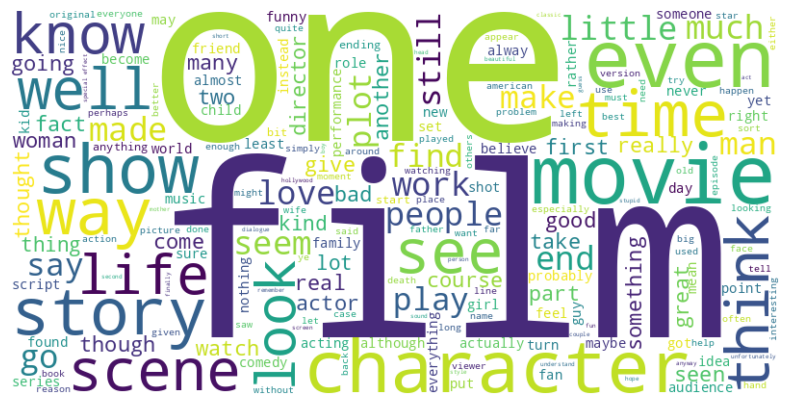

In [ ]:
#creating a word cloud for visualization.
text1 = " ".join(df['clean_review'].astype(str))#converting the series (review) into a string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')## interpolation='bilinear' smooths the image when scaling it for display,
# making it look cleaner by estimating pixel values between known values. As we know, interpolation is when we make guesses
#on unknown values based on the known data.
plt.axis("off")
plt.show()#a much cleaner word cloud can be seen

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1, 2),max_features=10000)
X=tfidf.fit_transform(df['clean_review'])#vectorization is done is this step
y=df['sentiment'].map({'positive':1,'negative':0})#encoded the sentiment column as 0 and 1 to enable smooth visualization.
#both features are assigned to a variable.
y.head(5)

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

Building models. I will be building 3 models:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
#splitting data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#building Logistic Regression model:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
#building Linear SVM model:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
#building Naive Bayes model:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
#predicting:
lr_preds = lr_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
#Evaluating the model's performance:
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print("\n🔹 Linear SVM")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))
print("\n🔹 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

🔹 Logistic Regression
Accuracy: 0.8991
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


🔹 Linear SVM
Accuracy: 0.8894
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


🔹 Naive Bayes
Accuracy: 0.8683
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87   

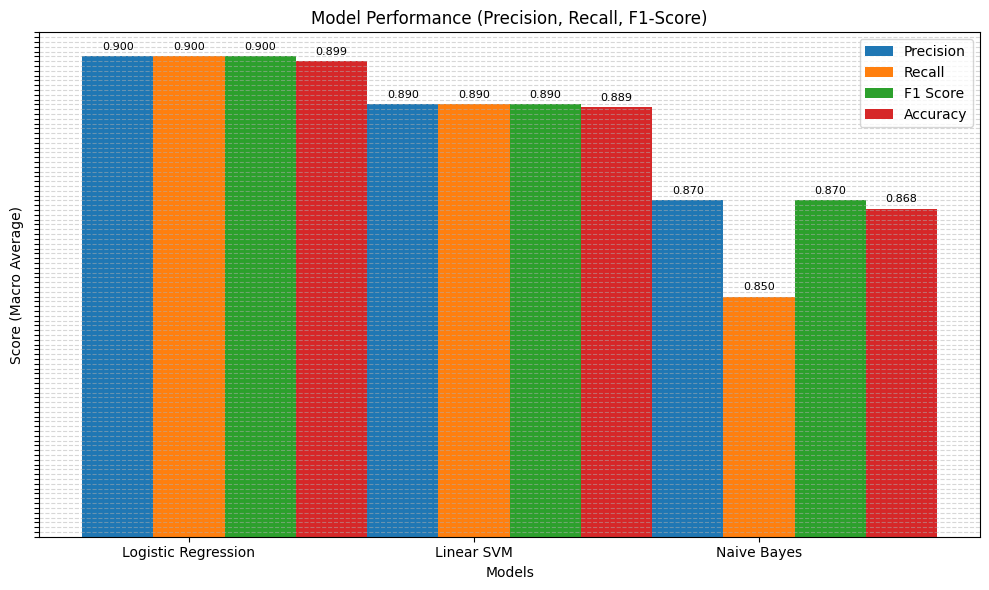

In [ ]:
#I have used macro average values.
models = ['Logistic Regression', 'Linear SVM', 'Naive Bayes']
precision = [0.9000, 0.8900, 0.8700]
recall    = [0.9000, 0.8900, 0.8500]
f1_score  = [0.9000, 0.8900, 0.8700]
accuracy  = [0.8991, 0.8894, 0.8683]
#plotting a bar graph to visulaize and compare model's performances
x = np.arange(len(models))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score')
bars4 = ax.bar(x + 2*width, accuracy, width, label='Accuracy')
#setting Y-axis at 0.001 intervals
ax.set_ylim([0.850, 0.905])
ax.set_yticks(np.arange(0.800, 0.906, 0.001))
ax.set_yticklabels([f"{tick:.3f}" if tick % 0.005 == 0 else "" for tick in np.arange(0.800, 0.906, 0.001)])#removing y-axis labels
def add_labels(bars):#adding exact values on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
ax.set_xlabel('Models')
ax.set_ylabel('Score (Macro Average)')
ax.set_title('Model Performance (Precision, Recall, F1-Score)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#letting the models predict:
new_reviews = [
    "The storyline was engaging and the characters were well-developed. I really enjoyed the pacing.",
    "Excellent acting and cinematography. One of the best movies I've seen this year.",
    "It had some good moments, but overall it felt a bit too long.",
    "The film was okay. Not great, but not terrible either. Worth a one-time watch.",
    "I found the plot confusing and the characters underwritten. It didn’t live up to my expectations."
    "The movie had a strong start, but it lost momentum halfway through.",
    "An emotionally powerful film with a touching storyline.",
    "I expected more from the ending, it felt rushed.",
    "The characters were relatable and very well-acted.",
    "A slow burn, but it pays off with a great climax.",
    "Visually stunning but lacking depth in the plot.",
    "The pacing was inconsistent, making it hard to stay engaged.",
    "It’s a good one-time watch but nothing memorable.",
    "Brilliant direction and music, I loved every minute.",
    "I found the film confusing, and the editing didn’t help.",
    "Decent movie, but not as good as the hype made it seem.",
    "A beautifully told story with a strong emotional core.",
    "There were too many subplots that didn’t go anywhere.",
    "I was pleasantly surprised by how good this film was.",
    "The script felt weak and the dialogues were cringeworthy.",
    "A charming little film with heart and humor.",
    "I wouldn’t recommend it, but it’s not the worst either.",
    "A solid effort, though a bit predictable.",
    "Great cast, but they couldn’t save a dull script."
]
# Assuming you used a TF-IDF vectorizer (same one as for training)
# Transform the new reviews
X_new = tfidf.transform(new_reviews)
# Predict using each model
lr_preds = lr_model.predict(X_new)
svm_preds = svm_model.predict(X_new)
nb_preds = nb_model.predict(X_new)
# Combine all predictions into a dataframe for comparison
import pandas as pd
df_preds = pd.DataFrame({
    'Logistic Regression': lr_preds,
    'Linear SVM': svm_preds,
    'Naive Bayes': nb_preds
})
# Replace 0/1 with readable sentiment
df_preds.replace({0: 'Negative', 1: 'Positive'}, inplace=True)
print(df_preds)
# we can clearly see the difference in some prediction made by the 3 models. i have not set a standard to check the accuracy of the pedictions. but this can be done

   Logistic Regression Linear SVM Naive Bayes
0             Positive   Positive    Positive
1             Positive   Positive    Positive
2             Positive   Positive    Positive
3             Negative   Negative    Negative
4             Negative   Negative    Negative
5             Positive   Positive    Positive
6             Negative   Positive    Negative
7             Positive   Positive    Positive
8             Positive   Positive    Negative
9             Negative   Negative    Positive
10            Negative   Negative    Negative
11            Positive   Positive    Positive
12            Positive   Positive    Positive
13            Negative   Negative    Negative
14            Negative   Negative    Negative
15            Positive   Positive    Positive
16            Positive   Positive    Negative
17            Positive   Positive    Positive
18            Negative   Negative    Negative
19            Positive   Positive    Positive
20            Negative   Negative 

## **Summarizing:**
**The best performing model has been Logistic Regression model. These findings contradict my previous attempt on this project, as, SVM was not the best performing model in this case. The differences in their performance lies in the preprocessing of teh dataset. Logistic regression model imroves its performance with a heavy margin if data processing is done right. SVM model is not affected much by spelling mistakes or preprocessing.*